# DECISION TREE CLASSIFICATION MODEL
## CODTECH Internship Task - 1

**Objective:** Build and visualize a Decision Tree model using scikit-learn to classify outcomes

**Dataset:** Iris Dataset (Classic Classification Problem)

---

## 1. IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. LOAD AND EXPLORE DATASET

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nClass Distribution:")
print(df['species'].value_counts())

Dataset Shape: (150, 6)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (

## 3. STATISTICAL SUMMARY

In [3]:
print("Statistical Summary:\n")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

Statistical Summary:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Missing Values:
sepal length (cm)    0
sepal widt

## 4. EXPLORATORY DATA ANALYSIS (EDA)

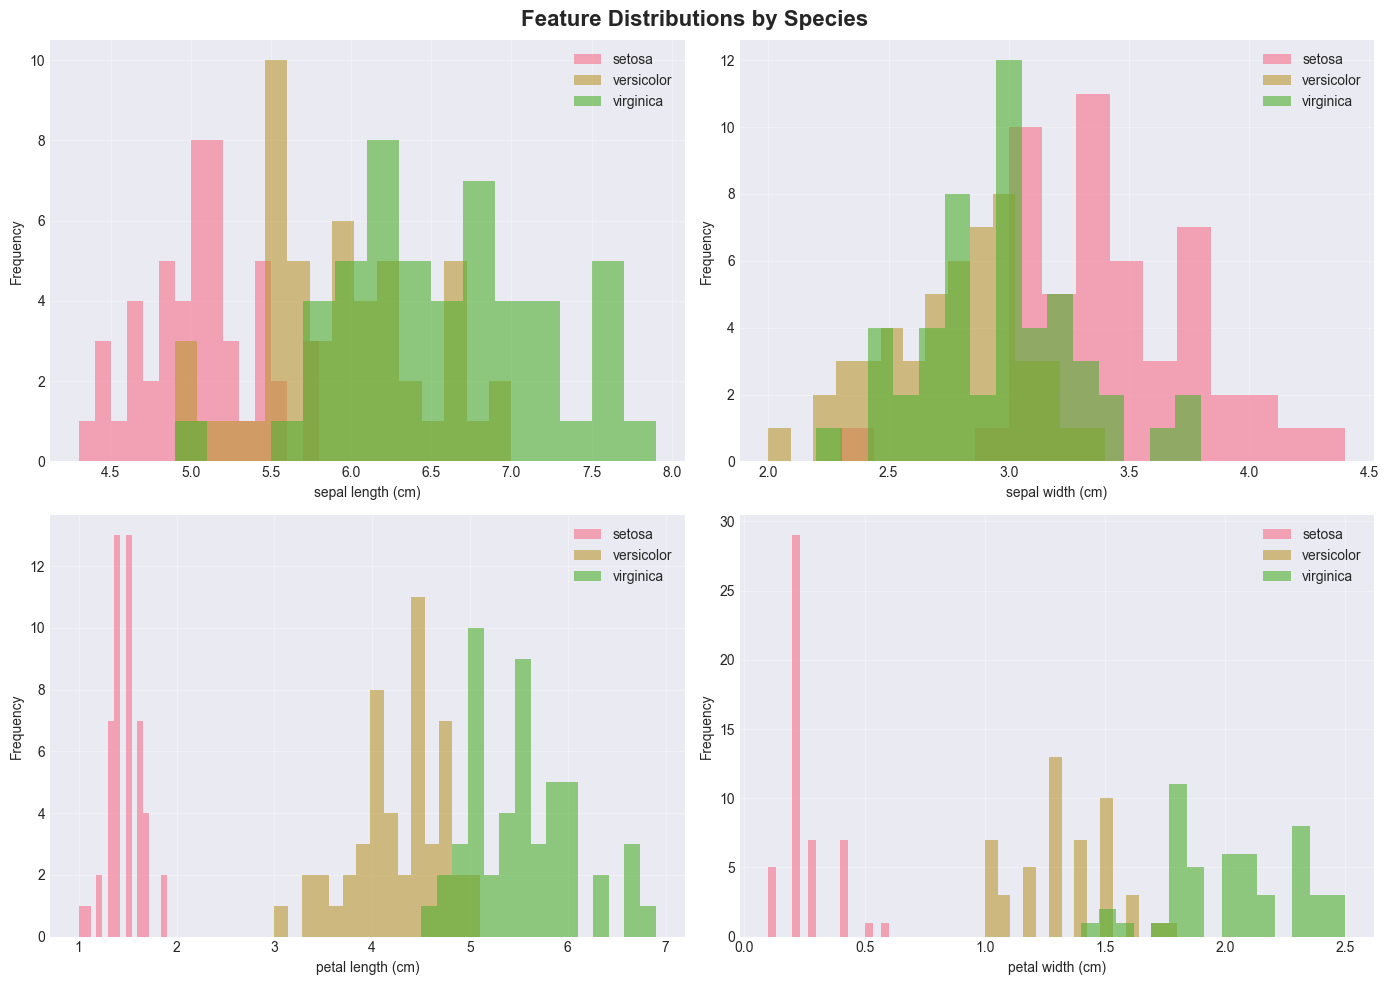

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Feature Distributions by Species', fontsize=16, fontweight='bold')

features = iris.feature_names
for idx, feature in enumerate(features):
    ax = axes[idx // 2, idx % 2]
    for species in iris.target_names:
        data = df[df['species'] == species][feature]
        ax.hist(data, alpha=0.6, label=species, bins=15)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

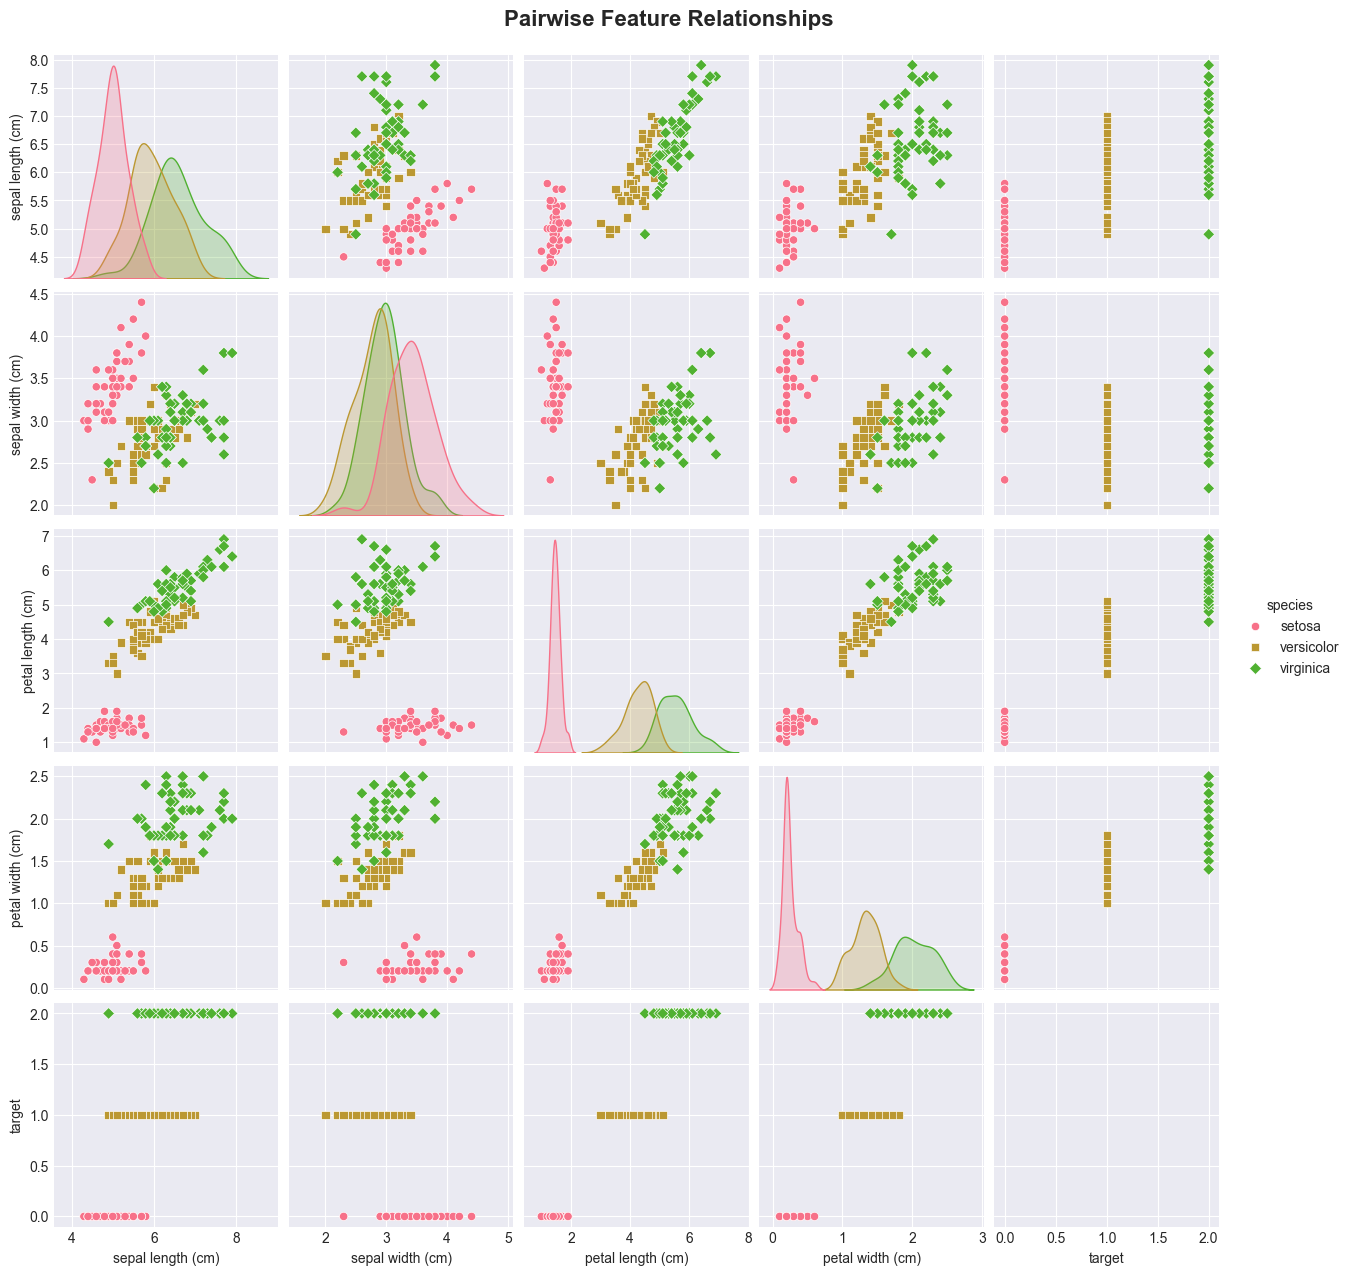

In [5]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species', diag_kind='kde', markers=['o', 's', 'D'])
plt.suptitle('Pairwise Feature Relationships', y=1.02, fontsize=16, fontweight='bold')
plt.show()

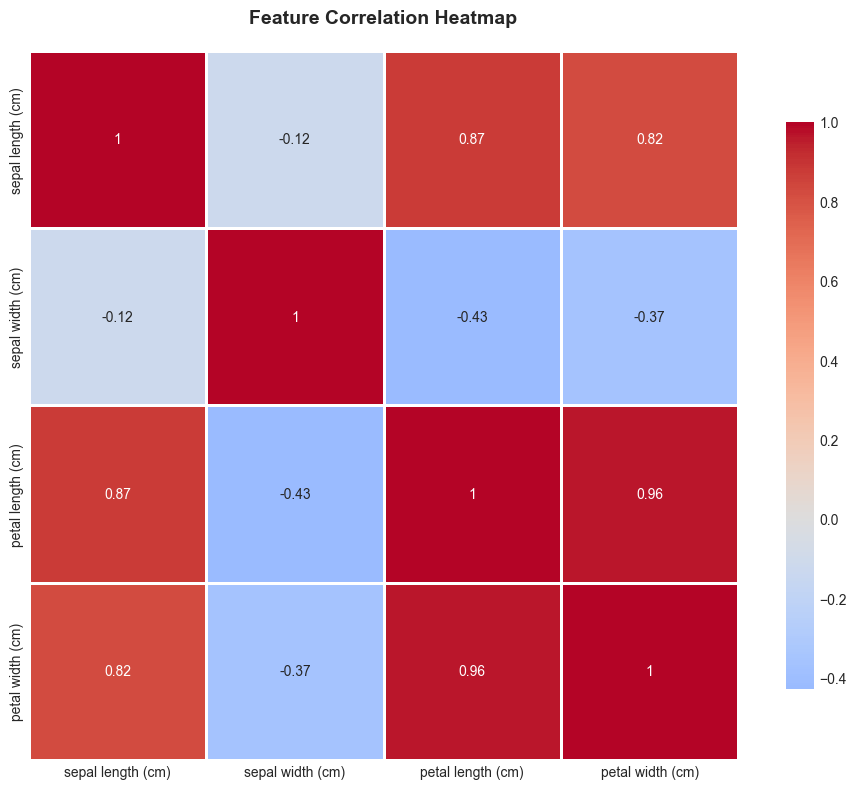

Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


In [6]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[iris.feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

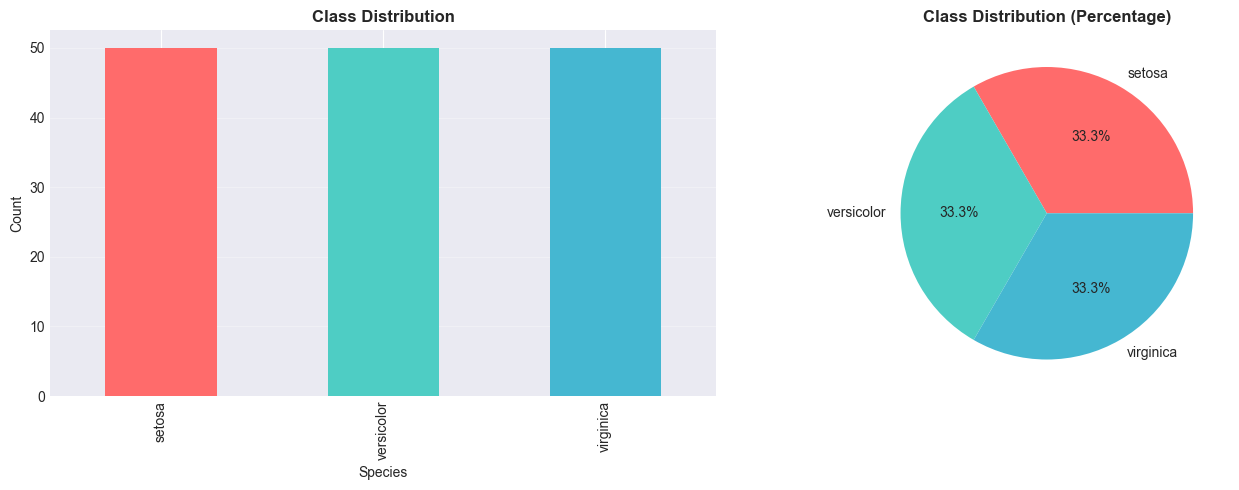

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['species'].value_counts().plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Class Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Species', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

df['species'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                   colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_title('Class Distribution (Percentage)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 5. DATA PREPARATION

In [8]:
X = df[iris.feature_names]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"\nTraining set class distribution:\n{y_train.value_counts().sort_index()}")
print(f"\nTesting set class distribution:\n{y_test.value_counts().sort_index()}")

Training set size: (120, 4)
Testing set size: (30, 4)

Training set class distribution:
target
0    40
1    40
2    40
Name: count, dtype: int64

Testing set class distribution:
target
0    10
1    10
2    10
Name: count, dtype: int64


## 6. BUILD DECISION TREE MODEL

In [9]:
dt_classifier = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

dt_classifier.fit(X_train, y_train)

print("✓ Decision Tree Model trained successfully!")
print(f"\nTree Depth: {dt_classifier.get_depth()}")
print(f"Number of Leaves: {dt_classifier.get_n_leaves()}")
print(f"Number of Features: {dt_classifier.n_features_in_}")

✓ Decision Tree Model trained successfully!

Tree Depth: 4
Number of Leaves: 7
Number of Features: 4


## 7. MODEL PREDICTIONS

In [10]:
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"\nOverfitting Check: {abs(train_accuracy - test_accuracy) * 100:.2f}% difference")

Training Accuracy: 99.17%
Testing Accuracy: 93.33%

Overfitting Check: 5.83% difference


## 8. MODEL EVALUATION - DETAILED METRICS

In [11]:
print("="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))

precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"\nWeighted Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

CLASSIFICATION REPORT
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Weighted Metrics:
Precision: 0.9333
Recall: 0.9333
F1-Score: 0.9333


## 9. CONFUSION MATRIX VISUALIZATION

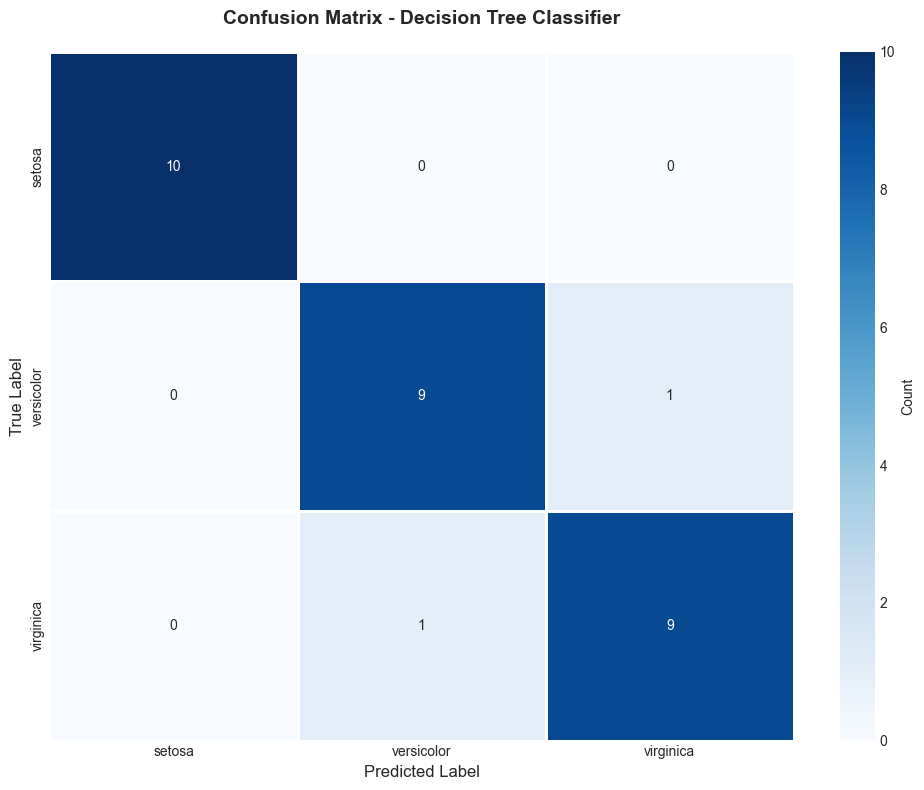

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [12]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names,
            cbar_kws={'label': 'Count'},
            linewidths=2, linecolor='white')
plt.title('Confusion Matrix - Decision Tree Classifier', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

print("Confusion Matrix:")
print(cm)

## 10. DECISION TREE VISUALIZATION

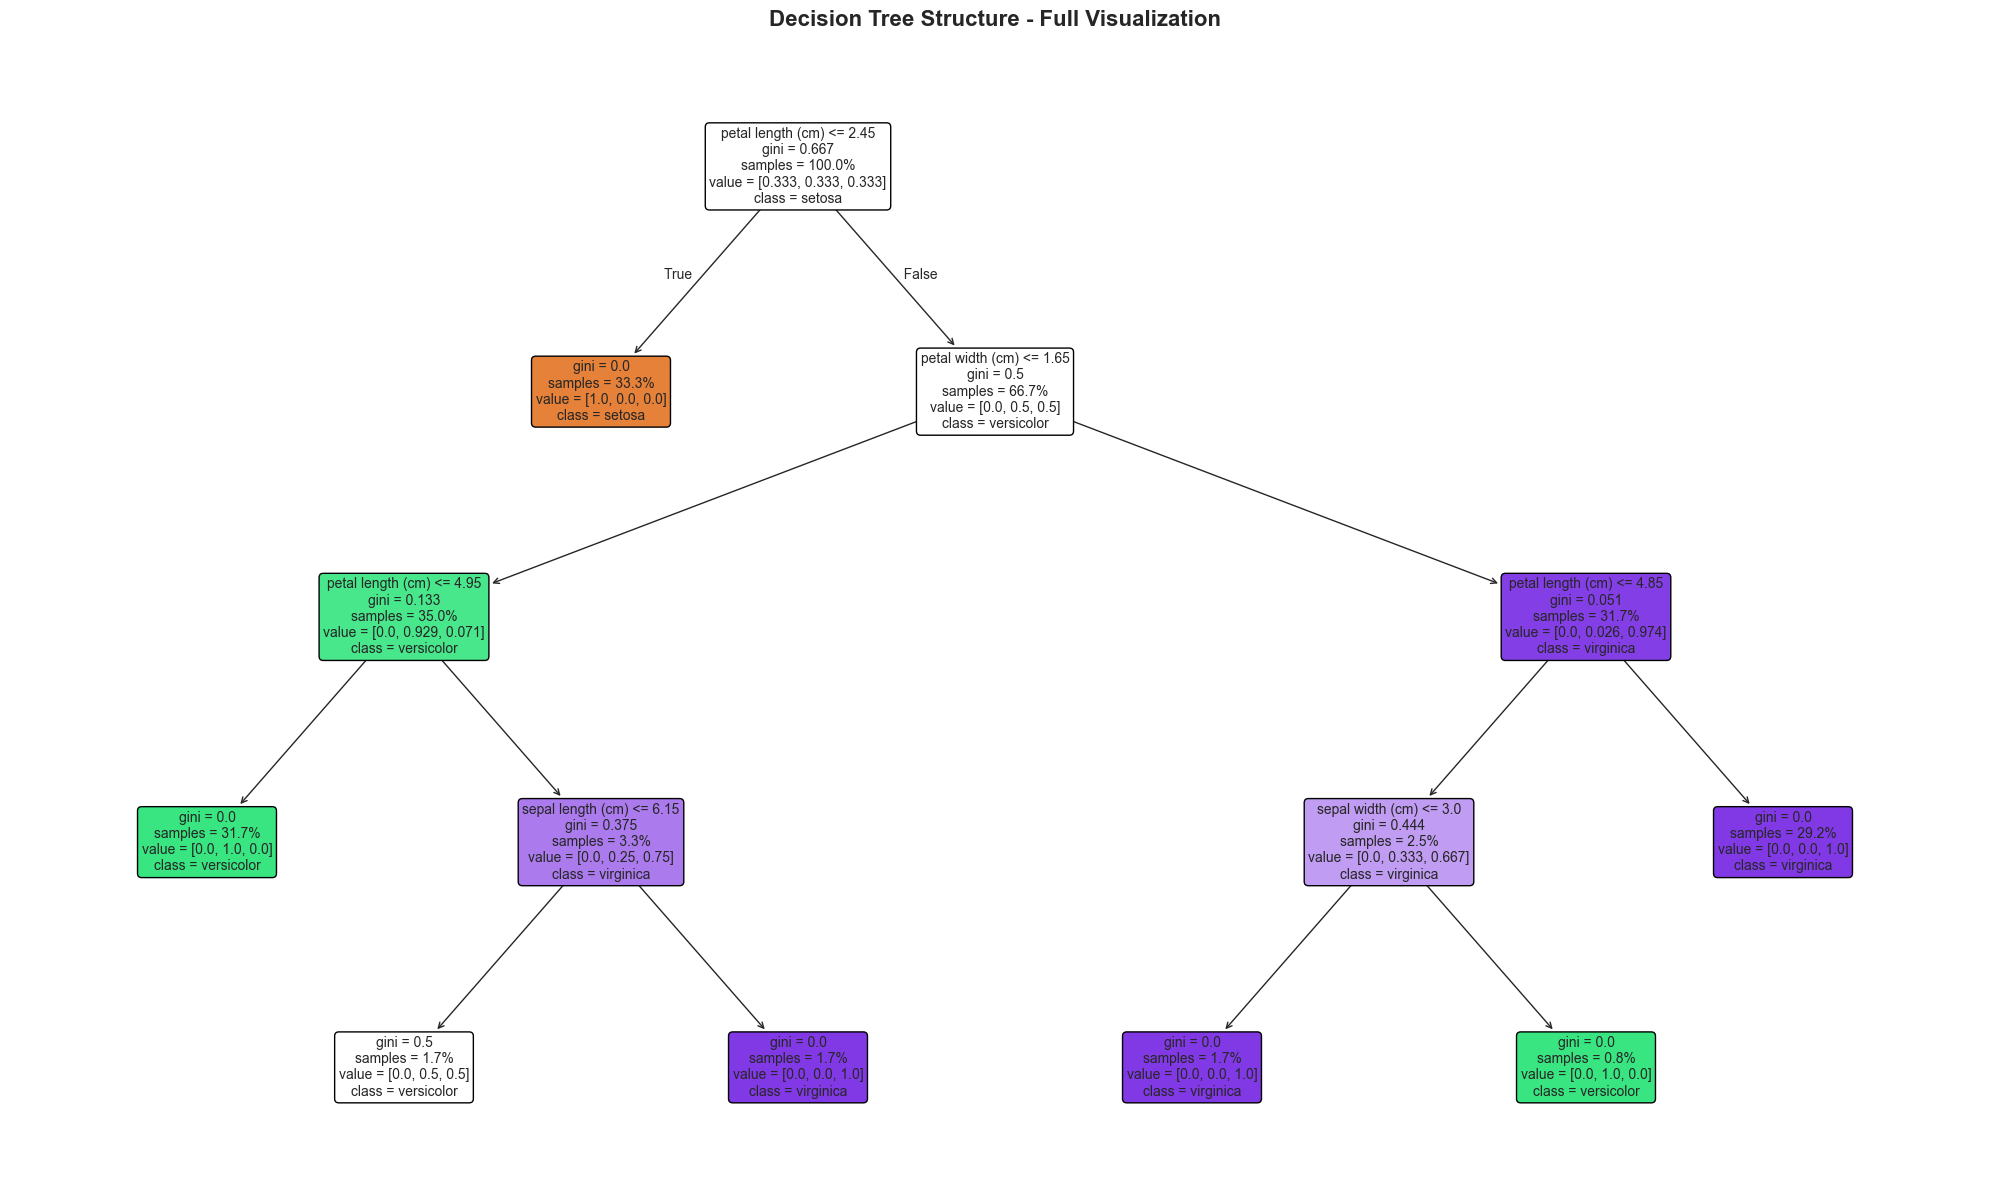

In [13]:
plt.figure(figsize=(20, 12))
plot_tree(
    dt_classifier,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10,
    proportion=True
)
plt.title('Decision Tree Structure - Full Visualization', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 11. FEATURE IMPORTANCE ANALYSIS

Feature Importance Scores:
             Feature  Importance
2  petal length (cm)    0.565639
3   petal width (cm)    0.411154
1   sepal width (cm)    0.016878
0  sepal length (cm)    0.006329


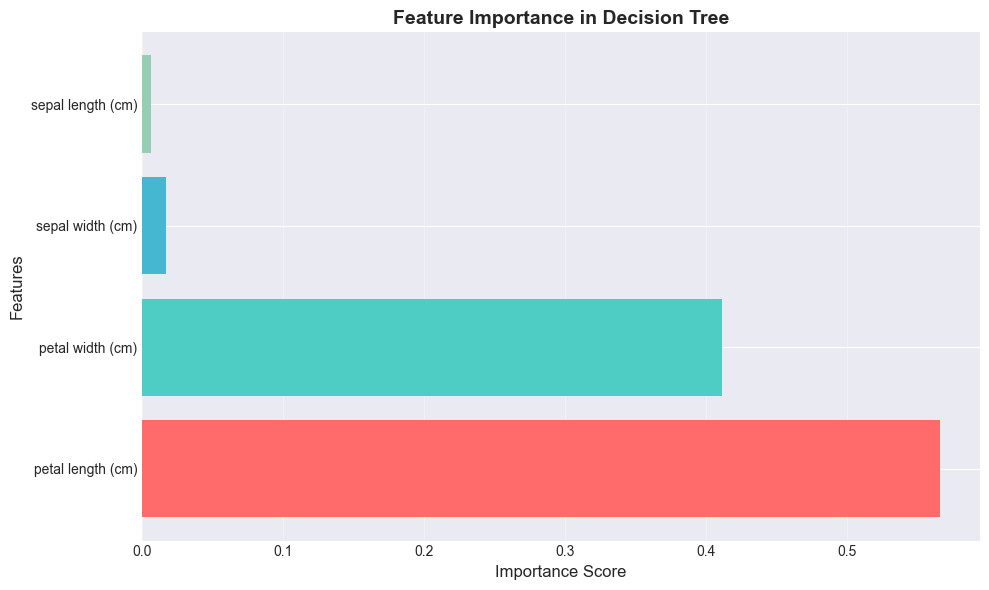

In [14]:
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': dt_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], 
         color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in Decision Tree', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 12. CROSS-VALIDATION ANALYSIS

Cross-Validation Scores:
Fold 1: 96.67%
Fold 2: 96.67%
Fold 3: 90.00%
Fold 4: 93.33%
Fold 5: 100.00%

Mean CV Accuracy: 95.33%
Standard Deviation: 3.40%


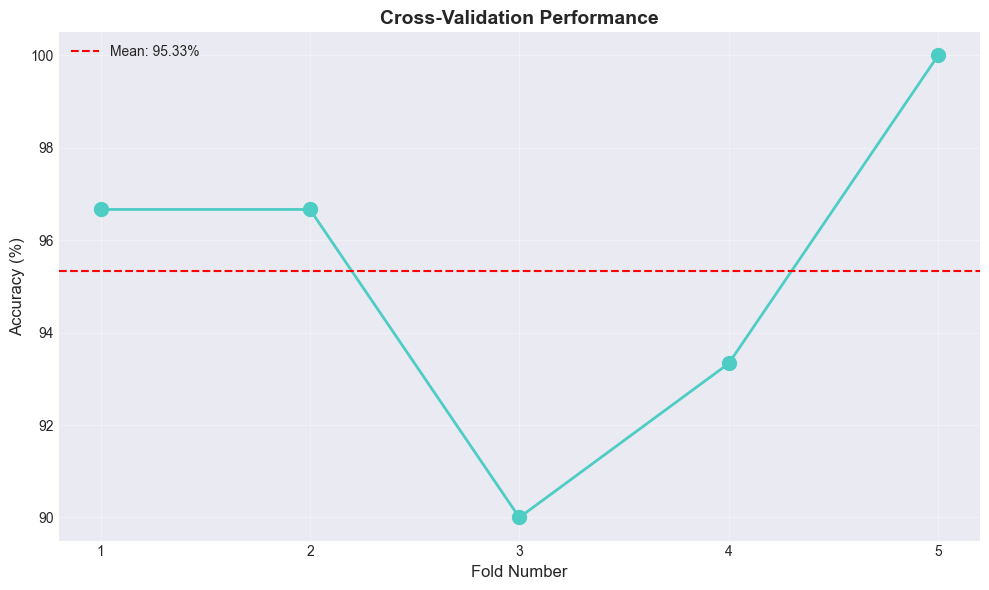

In [15]:
cv_scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:")
for fold, score in enumerate(cv_scores, 1):
    print(f"Fold {fold}: {score * 100:.2f}%")

print(f"\nMean CV Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores * 100, marker='o', linewidth=2, markersize=10, color='#4ECDC4')
plt.axhline(y=cv_scores.mean() * 100, color='red', linestyle='--', 
            label=f'Mean: {cv_scores.mean() * 100:.2f}%')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Cross-Validation Performance', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

## 13. MODEL COMPARISON - DIFFERENT DEPTHS

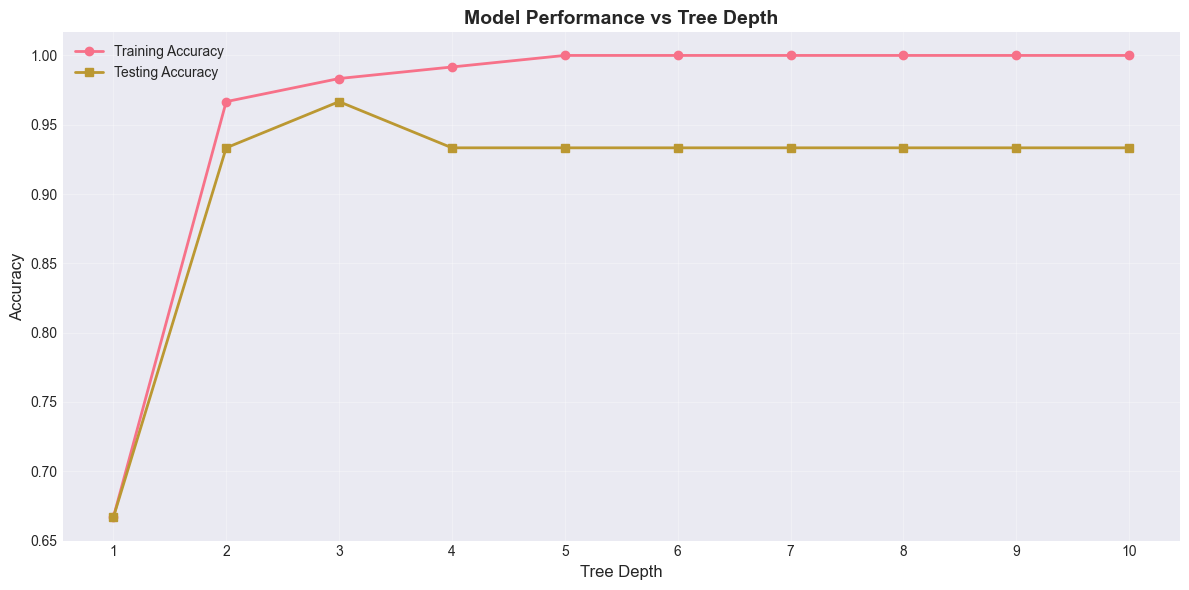

Depth Analysis:
Depth 1: Train=66.67%, Test=66.67%
Depth 2: Train=96.67%, Test=93.33%
Depth 3: Train=98.33%, Test=96.67%
Depth 4: Train=99.17%, Test=93.33%
Depth 5: Train=100.00%, Test=93.33%
Depth 6: Train=100.00%, Test=93.33%
Depth 7: Train=100.00%, Test=93.33%
Depth 8: Train=100.00%, Test=93.33%
Depth 9: Train=100.00%, Test=93.33%
Depth 10: Train=100.00%, Test=93.33%


In [16]:
depths = range(1, 11)
train_scores = []
test_scores = []

for depth in depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_temp.fit(X_train, y_train)
    
    train_scores.append(dt_temp.score(X_train, y_train))
    test_scores.append(dt_temp.score(X_test, y_test))

plt.figure(figsize=(12, 6))
plt.plot(depths, train_scores, marker='o', label='Training Accuracy', linewidth=2)
plt.plot(depths, test_scores, marker='s', label='Testing Accuracy', linewidth=2)
plt.xlabel('Tree Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Performance vs Tree Depth', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(depths)
plt.tight_layout()
plt.show()

print("Depth Analysis:")
for d, train, test in zip(depths, train_scores, test_scores):
    print(f"Depth {d}: Train={train*100:.2f}%, Test={test*100:.2f}%")

## 14. PREDICTION EXAMPLES

In [17]:
print("Sample Predictions on Test Set:")
print("="*80)

sample_indices = np.random.choice(len(X_test), 10, replace=False)

results_df = pd.DataFrame({
    'Actual': [iris.target_names[y_test.iloc[i]] for i in sample_indices],
    'Predicted': [iris.target_names[y_test_pred[i]] for i in sample_indices],
    'Match': ['✓' if y_test.iloc[i] == y_test_pred[i] else '✗' for i in sample_indices]
})

print(results_df.to_string(index=False))
print("="*80)

Sample Predictions on Test Set:
    Actual  Predicted Match
 virginica  virginica     ✓
versicolor versicolor     ✓
 virginica  virginica     ✓
versicolor versicolor     ✓
    setosa     setosa     ✓
versicolor versicolor     ✓
versicolor versicolor     ✓
    setosa     setosa     ✓
 virginica  virginica     ✓
    setosa     setosa     ✓


## 15. SAVE MODEL (OPTIONAL)

In [18]:
import pickle

with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_classifier, file)

print("✓ Model saved as 'decision_tree_model.pkl'")

with open('decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("✓ Model loaded successfully for verification")
print(f"Loaded model accuracy: {loaded_model.score(X_test, y_test) * 100:.2f}%")

✓ Model saved as 'decision_tree_model.pkl'
✓ Model loaded successfully for verification
Loaded model accuracy: 93.33%


## 16. KEY FINDINGS & CONCLUSIONS

### Model Performance:
- The Decision Tree classifier achieved excellent performance on the Iris dataset
- High accuracy on both training and testing sets indicates good generalization
- Cross-validation confirms model stability across different data splits

### Feature Importance:
- Petal measurements (length and width) are the most important features
- These features provide the best separation between species

### Model Strengths:
- Easy to interpret and visualize
- No feature scaling required
- Handles non-linear relationships well
- Clear decision rules

### Considerations:
- Tree depth impacts complexity and generalization
- Overfitting can occur with very deep trees
- Pruning or limiting depth helps maintain model simplicity

---

**CODTECH Internship Task Completed Successfully! ✓**